<center>
<b><font size=6>Industry 4.0 의 중심, AI - ML&DL</font></b>
</center>

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect1. TensorFlow 개요
> 
<a href="https://www.tensorflow.org/get_started/get_started">Getting Started With TensorFlow</a>

In [1]:
from images import bigpycraft_copy as bpc

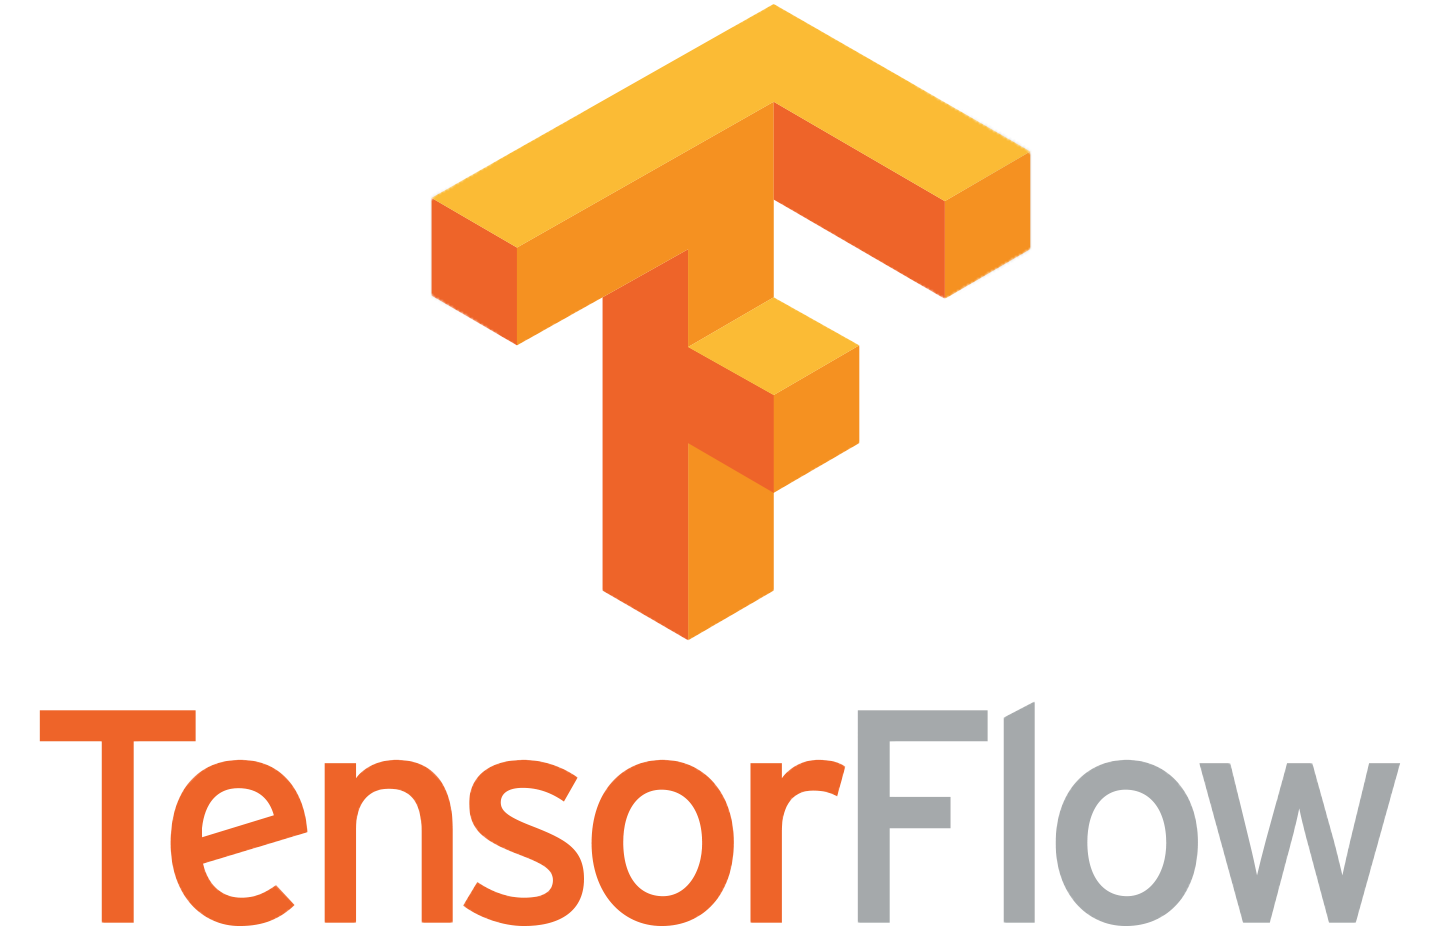

In [2]:
bpc.Figure(bpc.LOGO_TF_01, 200)

> 
- TensorFlow™ is an open source software library for numerical computation using data flow graphs.
- Python!

## Data Flow Graph
> 
- Nodes in the graph represent mathematical operations
- Edges represent the multidimensional data arrays (tensors) communicated between them. 
<!--
<img src="./images/lab01_Data_Flow_Graph.png" alt="Data Flow Graph" style="width: 250px;"/>
-->

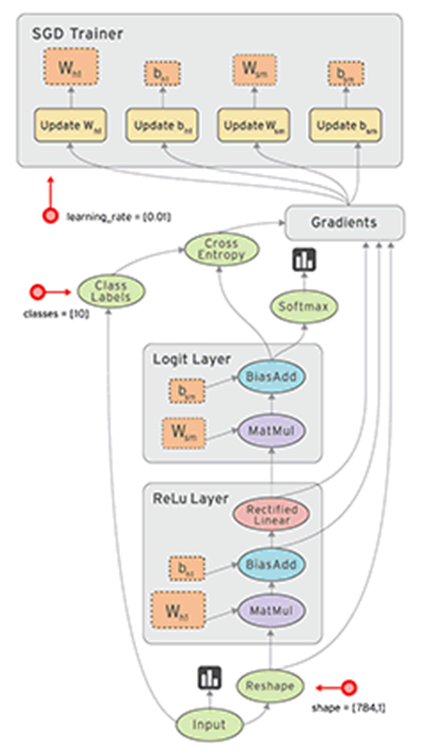

In [3]:
bpc.Figure(bpc.ML01_IMG_01, 200*1)

## Install & Update Package TensorFlow
>  
1. python pip command 
 * (VirtualEnv) pip install tensorflow 
 * (VirtualEnv) pip install tensorflow --upgrade
2. anaconda command
 * conda install tensorflow
 * conda update tensorflow

<!--
<br> <font color='brown'>(VirtualEnv) pip install tensorflow </font>
<img src="./images/lab01_install_TF_jupyter.png" style="width: 500px;"/>
-->


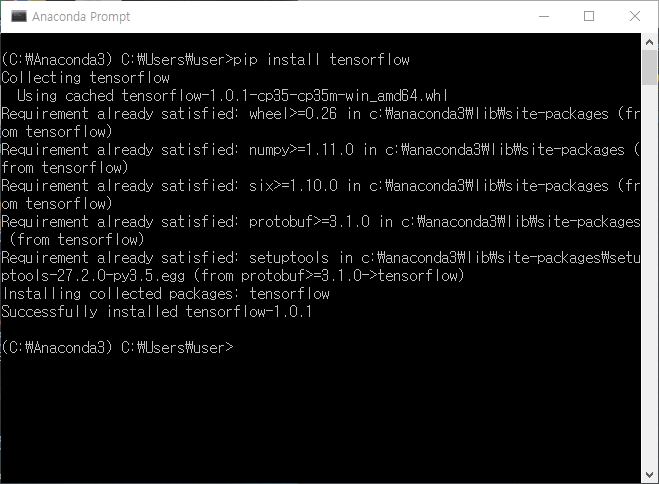

In [4]:
bpc.Figure(bpc.ML01_IMG_02, 500)

> 
- #### PyCharm
  <br> File &gt; settings... Ctrl+Alt+S
  <!--
  <img src="./images/lab01_install_TF_pycharm.png" style="width: 500px;"/>
  -->

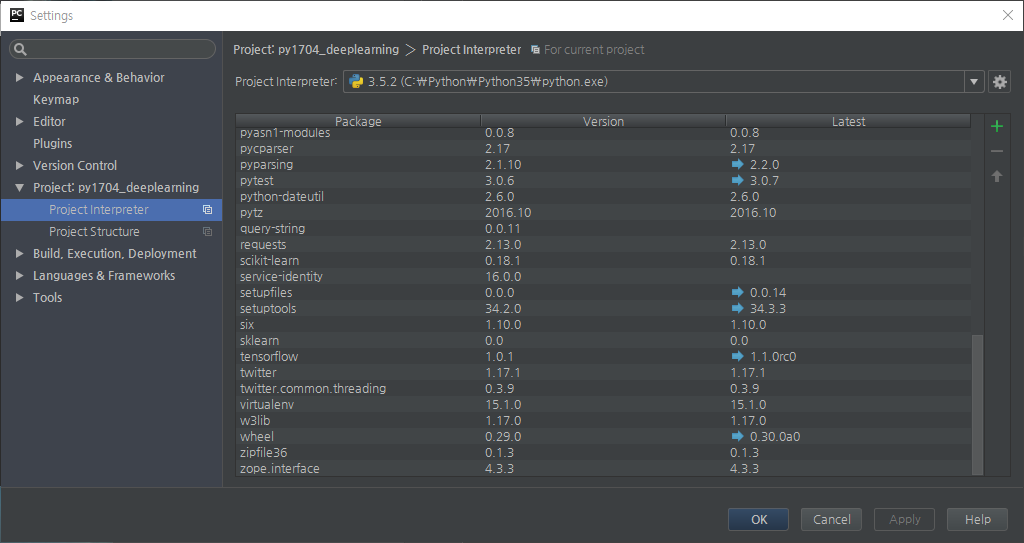

In [5]:
bpc.Figure(bpc.ML01_IMG_03, 500)

## Check TF version

In [6]:
# ! pip install tensorflow
# ! conda install tensorflow

In [7]:
import tensorflow as tf

tf.__version__

/Users/bigpycraft/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.9.0'

## Hello TensorFlow!

In [8]:
# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()


In [9]:
hello

<tf.Tensor 'Const:0' shape=() dtype=string>

In [10]:
# run the op and get result
sess.run(hello)

b'Hello, TensorFlow!'

In [11]:
result = sess.run(hello)
type(result)

bytes

<font color='#cc0000'> [TIP] b 'String' </font>
> 
- 'b' indicates Bytes literals.
- 참조 : <a href="http://stackoverflow.com/questions/6269765/">What does the 'b' character do in front of a string literal?</a>

In [12]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [13]:
type(sess)

tensorflow.python.client.session.Session

In [14]:
# ? tf.constant
# Creates a constant tensor.

## Computational Graph

In [15]:
# node1 = tf.constant(3.0, tf.float32)
node1 = tf.constant(3.0)
node2 = tf.constant(4.0)            # also tf.float32 implicitly
node3 = tf.add(node1, node2)
# node3 = node1 + node2

In [16]:
print("node1 :", node1)
print("node2 :", node2)
print("node3 :", node3)

node1 : Tensor("Const_1:0", shape=(), dtype=float32)
node2 : Tensor("Const_2:0", shape=(), dtype=float32)
node3 : Tensor("Add:0", shape=(), dtype=float32)


![Graph](https://www.tensorflow.org/images/getting_started_adder.png)

In [17]:
sess = tf.Session()
print("sess.run(node1, node2)\t: ", sess.run([node1, node2, node3]))
print("sess.run(adder_node)  \t: ", sess.run(node3))

sess.run(node1, node2)	:  [3.0, 4.0, 7.0]
sess.run(adder_node)  	:  7.0


In [18]:
type(node3)

tensorflow.python.framework.ops.Tensor

In [19]:
type(sess.run(node3))

numpy.float32

### TensorFlow Mechanics
> 
1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

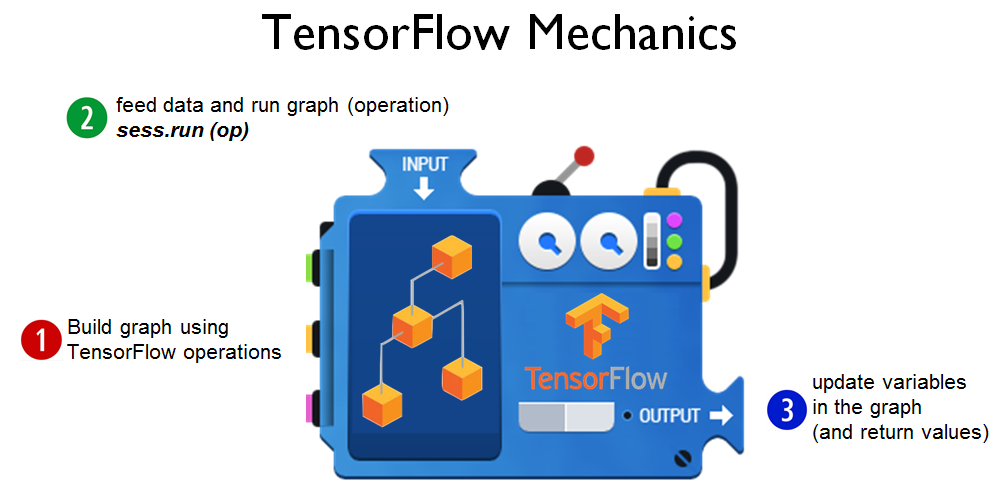

In [20]:
# TensorFlow Mechanism 이해
bpc.Figure(bpc.ML01_IMG_04)

### Placeholder

In [21]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# + provides a shortcut for tf.add(a, b)
adder_node = a + b  

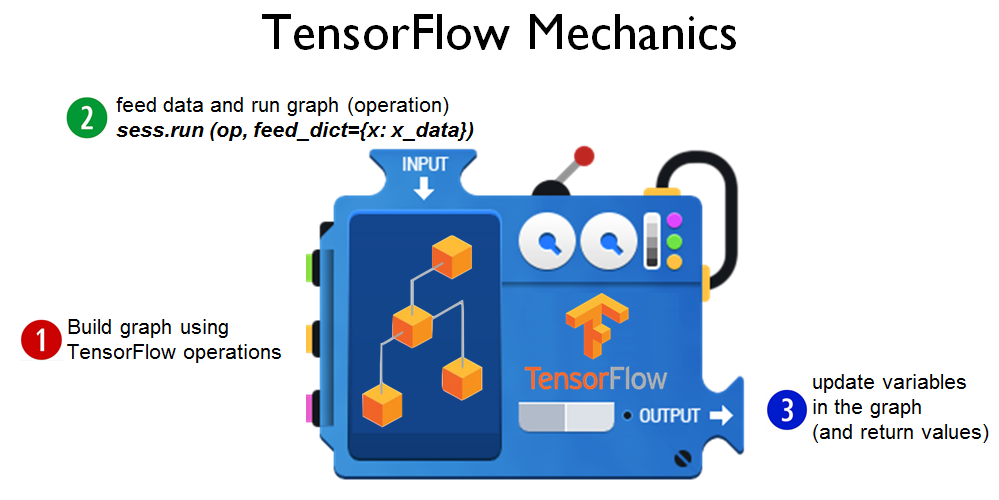

In [22]:
# TensorFlow Mechanism for placeholder
bpc.Figure(bpc.ML01_IMG_05)

In [23]:
sess.run(adder_node, feed_dict={a: 3, b: 4.5})

7.5

In [24]:
sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]})

array([3., 7.], dtype=float32)

In [25]:
add_and_triple = adder_node * 3.

In [26]:
sess.run(add_and_triple, feed_dict={a: 3, b:4.5})

22.5

In [27]:
import tensorflow as tf

# 변수 a, b는 동적으로 지정
# a = tf.placeholder("float32")
# b = tf.placeholder("float32")
a = tf.placeholder("int32")
b = tf.placeholder("int32")

# multiply 함수는 입력된 정수 a와 b의 곱셈을 반환한다.
y = tf.multiply(a,b)

sess = tf.Session()

print("tf.multiply({a},{b}) : {y}".format(
    a = 20, b = 30,
    y = sess.run(y , feed_dict={a: 20, b: 30})
))

tf.multiply(20,30) : 600


### Constant & Variable

In [28]:
#first_session_only_tensorflow.py
import tensorflow as tf

x = tf.constant(100, name='x')
y = tf.Variable(x*2, name='y')

# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    print("constant x : {x} \nVariable y : {y}".format(
        x = sess.run(x), 
        y = sess.run(y)
    ))

constant x : 100 
Variable y : 200


In [29]:
#first_session_only_tensorflow.py
import tensorflow as tf

x = tf.constant(100, name='x')
y = tf.Variable(x*2, name='y')

# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(model)
    print("Check the variable : \n- constant x : {x} \n- Variable y : {y}".format(
        x = sess.run(x), 
        y = sess.run(y)
    ))

Check the variable : 
- constant x : 100 
- Variable y : 200


###  Everything is Tensor

> 
- Tensor Ranks, Shapes, and Types
- n차원 Array == n차원 Tensor

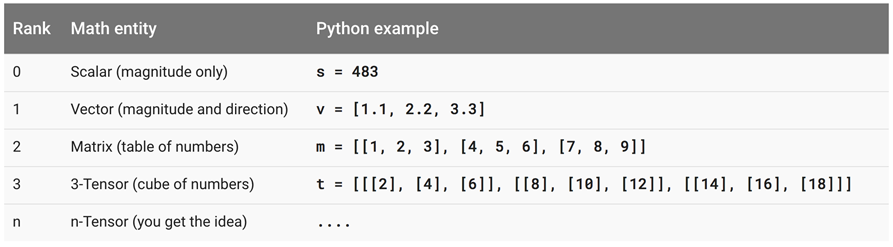

In [30]:
# TensorFlow : Math entity
bpc.Figure(bpc.ML01_IMG_06, 800)

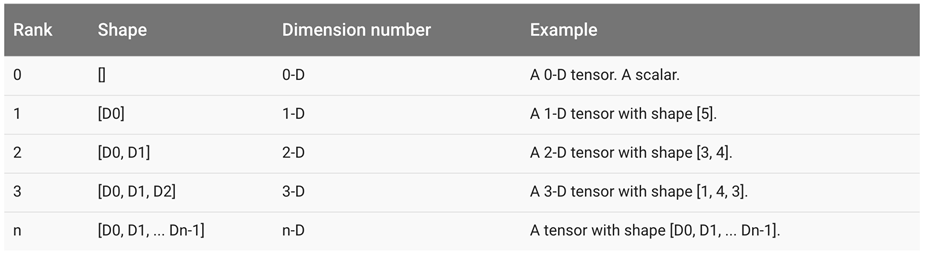

In [31]:
# TensorFlow : Shape, Dimension
bpc.Figure(bpc.ML01_IMG_07, 800)

In [32]:
rank0 = 3
rank0

3

In [33]:
rank1 = [1. ,2., 3.]
rank1

[1.0, 2.0, 3.0]

In [34]:
rank2 = [[1., 2., 3.], 
         [4., 5., 6.]]
rank2

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [35]:
rank3 = [
            [
                [1., 2., 3.]
            ], 
            [
                [7., 8., 9.]
            ]
] 
rank3

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

##  텐서플로우 연산

In [36]:
import tensorflow as tf 
import numpy as np

tensor_1d = np.array([1.2, 3.4, 5.6, 7.8])
tensor_2d = np.arange(16).reshape((4,4))
tensor_2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [37]:
sess = tf.Session()
tf_tensor_1d = tf.convert_to_tensor(tensor_1d,dtype=tf.float64)
tf_tensor_2d = tf.convert_to_tensor(tensor_2d,dtype=tf.float64)

In [38]:
sess.run(tf_tensor_1d)

array([1.2, 3.4, 5.6, 7.8])

In [39]:
sess.run(tf_tensor_1d[0])

1.2

In [40]:
sess.run(tf_tensor_1d[2:])

array([5.6, 7.8])

In [41]:
sess.run(tf_tensor_2d)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [42]:
#sess.run(tf_tensor_2d[3][3])
sess.run(tf_tensor_2d[3, 3])

15.0

In [43]:
sess.run(tf_tensor_2d[1:3, 1:3])

array([[ 5.,  6.],
       [ 9., 10.]])

In [44]:
import tensorflow as tf
import numpy as np

# 3x3 행렬
matrix1 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])
matrix2 = np.array([(2, 2, 2), (2, 2, 2), (2, 2, 2)])

# constant, 텐서 자료 구조로 변환
# matrix1 = tf.constant(matrix1)
# matrix2 = tf.constant(matrix2)
matrix1 = tf.constant(matrix1, dtype='int32')
matrix2 = tf.constant(matrix2, dtype='int32')

# 행렬곱과 행렬합 계산
matrix_mul = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

# 행렬의 행렬식(determinant)
matrix3 = np.array([(2, 7, 2), (1, 4, 2), (9, 0, 2)], dtype='float32')
print('matrix3 = {}'.format(matrix3))

matrix_dtm = tf.matrix_determinant(matrix3)
print('matrix_dtm = {}'.format(matrix_dtm))

# 세션을 열고 그래프 연산
with tf.Session() as sess:
    result1 = sess.run(matrix_mul)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_dtm)
    
    # tensorboard for graph
    # writer = tf.summary.FileWriter("./graph/sect01", sess.graph)

# 연산 결과 출력
print('matrix_mul = {}'.format(result1))
print('matrix_sum = {}'.format(result2))
print('matrix_dtm = {}'.format(result3))


matrix3 = [[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
matrix_dtm = Tensor("MatrixDeterminant:0", shape=(), dtype=float32)
matrix_mul = [[6 6 6]
 [6 6 6]
 [6 6 6]]
matrix_sum = [[3 3 3]
 [3 3 3]
 [3 3 3]]
matrix_dtm = 55.99999237060547


In [45]:
import tensorflow as tf
import numpy as np

# 3x3 행렬
matrix1 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])
matrix2 = np.array([(2, 2, 2), (2, 2, 2), (2, 2, 2)])

# constant, 텐서 자료 구조로 변환
# matrix1 = tf.constant(matrix1)
# matrix2 = tf.constant(matrix2)
matrix1 = tf.constant(matrix1, dtype='int32')
matrix2 = tf.constant(matrix2, dtype='int32')

# 행렬곱과 행렬합 계산
matrix_mul = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

# 행렬의 행렬식(determinant)
matrix3 = np.array([(2, 7, 2), (1, 4, 2), (9, 0, 2)], dtype='float32')
print('matrix3 = {}'.format(matrix3))

matrix_dtm = tf.matrix_determinant(matrix3)
print('matrix_dtm = {}'.format(matrix_dtm))



matrix3 = [[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
matrix_dtm = Tensor("MatrixDeterminant_1:0", shape=(), dtype=float32)


In [46]:
# 세션을 열고 그래프 연산
with tf.Session() as sess:
    result1 = sess.run(matrix_mul)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_dtm)
    
    # tensorboard for graph
    # need to be existed folder
    writer = tf.summary.FileWriter("./graph/ml101", sess.graph)

# 연산 결과 출력
print('matrix_mul = {}'.format(result1))
print('matrix_sum = {}'.format(result2))
print('matrix_dtm = {}'.format(result3))


matrix_mul = [[6 6 6]
 [6 6 6]
 [6 6 6]]
matrix_sum = [[3 3 3]
 [3 3 3]
 [3 3 3]]
matrix_dtm = 55.99999237060547


In [47]:
% pwd

'/Users/bigpycraft/BPC Dropbox/김진수/sect_tech/src_anaconda/P1810_Multi_Campus/sect30_tfmldl'

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>

In [48]:
! tensorboard --logdir=graph/ml101 --host=localhost --port=9999

/Users/bigpycraft/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
TensorBoard 1.9.0 at http://localhost:9999 (Press CTRL+C to quit)
^C


In [ ]:
<!--
(Anaconda3) > tensorboard --logdir=graph/board --port=9999

http://localhost:9999/#graphs
//-->